## **Name:** Affan Zulfiqar
## **Reg No:** B22F0144AI050
## **Course:** ANN LAB (02)

# **Lab Task**
**Select dataset of your own choice also provide reference link of datset.**

**Apply preprocessing techniques on your dataset.**

**Remove outliers in your dataset.**

**Apply ANN model on you dataset and perform visualization**

**Importing libraries**

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

**Load and display of Dataset:**
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [9]:
data = pd.read_csv('heart.csv')

print("Dataset Head:\n", data.head())

Dataset Head:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


**Dataset Info and Summary**

In [10]:
print("\nDataset Info:\n")
data.info()
print("\nStatistical Summary:\n", data.describe())




Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Statistical Summary:
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610

**Missing values**

In [11]:

print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**Removing Outliers and dataset Splitting**

In [12]:
from scipy.stats import zscore

print(f"Number of samples before removing outliers: {data.shape[0]}")
# Encode categorical variables
label_encoders = {}
for column in ['sex', 'cp', 'restecg', 'slope', 'thal']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Remove outliers using Z-score
z_scores = np.abs(zscore(data.select_dtypes(include=np.number)))
data = data[(z_scores < 3).all(axis=1)]

# Print the number of rows after removing outliers
print(f"Number of samples after removing outliers: {data.shape[0]}")

# Split the dataset into features and target
X = data.drop('target', axis=1)
y = data['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Number of samples before removing outliers: 1025
Number of samples after removing outliers: 969


**Model Training:**

In [13]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5970 - loss: 0.6623 - val_accuracy: 0.8454 - val_loss: 0.4719
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8157 - loss: 0.4776 - val_accuracy: 0.8763 - val_loss: 0.3536
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8369 - loss: 0.3787 - val_accuracy: 0.8814 - val_loss: 0.3094
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8194 - loss: 0.4028 - val_accuracy: 0.8969 - val_loss: 0.2834
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8360 - loss: 0.3912 - val_accuracy: 0.9072 - val_loss: 0.2765
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8861 - loss: 0.3156 - val_accuracy: 0.9021 - val_loss: 0.2657
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8429 - loss: 0.3545 - val_accuracy: 0.8969 - val_loss: 0.2619
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8562 - loss: 0.3395 - val_accuracy: 0.9072 - val_loss:

**Evaluation of model**

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Accuracy: 0.9587628865979382

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        89
           1       0.95      0.97      0.96       105

    accuracy                           0.96       194
   macro avg       0.96      0.96      0.96       194
weighted avg       0.96      0.96      0.96       194


Confusion Matrix:
 [[ 84   5]
 [  3 102]]


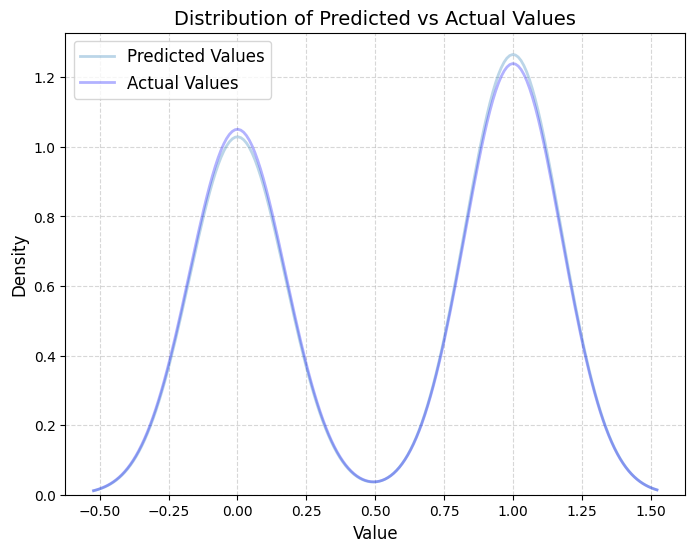

In [41]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
plt.figure(figsize=(8, 6))

sns.kdeplot(y_pred, color="r", label="Predicted Values", linewidth=2,  alpha=0.3)
sns.kdeplot(y_test, color="b", label="Actual Values", linewidth=2,  alpha=0.3)

plt.title('Distribution of Predicted vs Actual Values', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
plt.show()

**Visualiziation:**

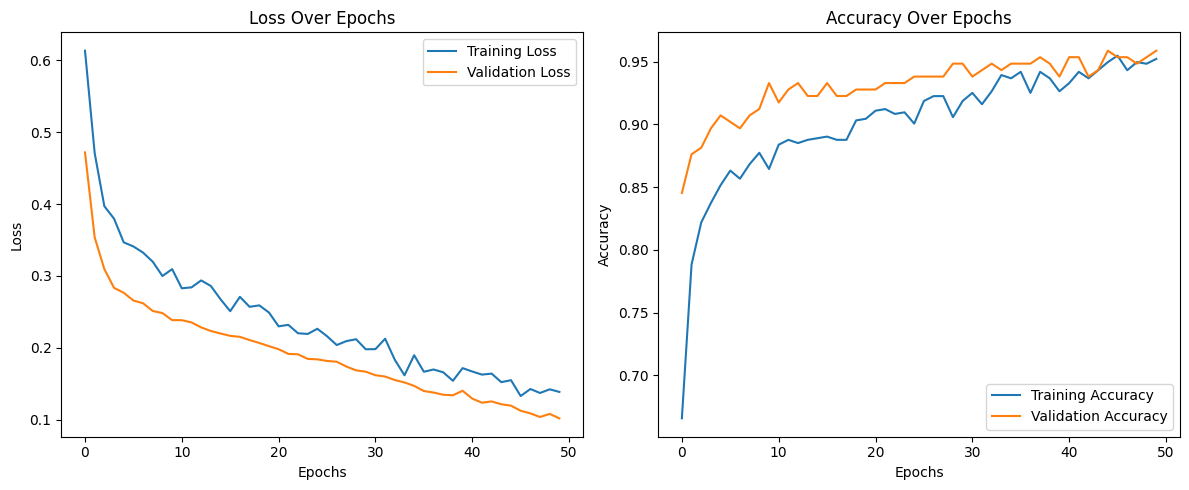

In [16]:
# Visualize Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

**Analysis**

The left chart shows the loss over epochs, where the training loss decreases sharply, indicating rapid learning, but the validation loss remains higher initially, suggesting potential overfitting. In the right chart, both training and validation accuracy rise steadily, stabilizing above 95% towards the end of training. This pattern indicates that while the model performs well on training data, attention must be paid to the validation loss fluctuations to ensure effective generalization to unseen data. Overall, the model demonstrates strong performance, but further tuning may be necessary to enhance generalization.

**Confusion Matrix Visualization**

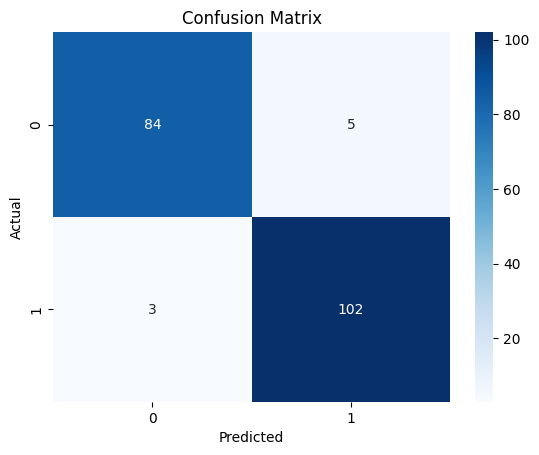

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**ROC Curve**

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


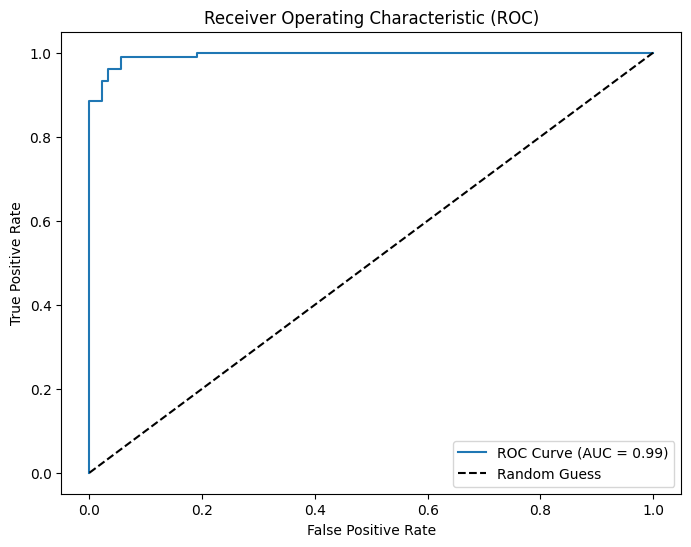

In [18]:
y_proba = model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("Receiver Operating Characteristic (ROC)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()